[130, 200, 230, 180, 220, 120, 220, 187.525, 70, 108.517, 290, 160, 183.736, 360]


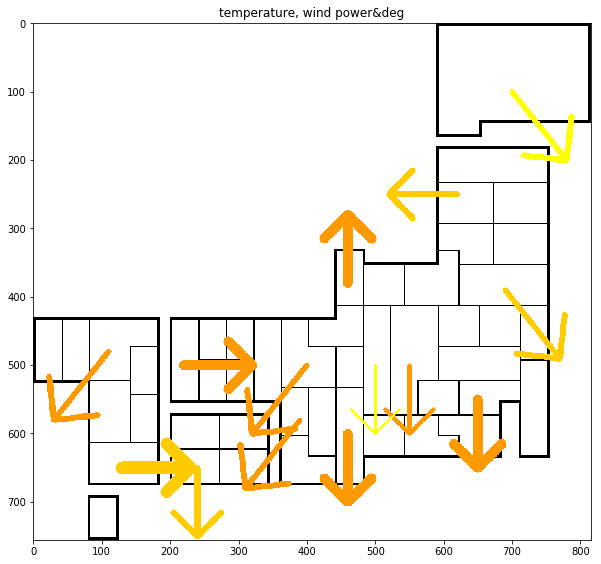

In [3]:
%matplotlib inline
import requests,json
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize']=10,10

img=cv2.imread("map1.png")#白地図

API_KEY = "0a5357d6b04726d418aad4cca2202999"
api = "http://api.openweathermap.org/data/2.5/weather?q={city}&units=metric&lang=ja&appid={key}"
pref_weather=["Hokkaidō","Tokyo","Fukuoka-ken","Kochi-shi","Osaka-shi","Fukushima-ken","Kyoto","Nagano-ken","Yamaguchi-ken",
              "Kagoshima-ken","Akita-ken","Mie-ken","Gifu-ken","Ishikawa-ken"]
angle=[]
wind=[]
tem=[]
for city_name in pref_weather:
    url = api.format(city = city_name, key = API_KEY)
    response = requests.get(url)
    data = json.loads(response.text)
    deg=data["wind"]["deg"]
    temp=data["main"]["temp"]
    wind_power=data["wind"]["speed"]
    angle.append(deg)
    tem.append(temp)
    wind.append(wind_power)

H_point=(700,100)#北海道の基準点
T_point=(650,550)#東京の基準点
F_point=(110,480)#福岡の基準点
K_point=(240,650)#高知の基準点
O_point=(390,580)#大阪の基準点
Hs_point=(690,390)#福島の基準点
Kyo_point=(400,500)#京都の基準点
N_point=(550,500)#長野の基準点
Y_point=(220,500)#山口の基準点
Kago_point=(130,650)#鹿児島の基準点
A_point=(620,250)#秋田の基準点
M_point=(460,600)#三重の基準点
G_point=(500,500)#岐阜の基準点
I_point=(460,380)#石川の基準点
#基準点から見た角度毎の対応
x=[100,80,0,-80,-100,-80,0,80]
y=[0,-100,-100,-100,0,100,100,100]

#角度の判定
def angle_check(d):
    if (360>= d>=337.5) or(0<d<22.5):
        r=(x[2],y[2])
        return r
    elif (22.5<=d<67.5):
        r=(x[1],y[1])
        return r
    elif (67.5<=d<112.5):
        r=(x[0],y[0])
        return r
    elif (112.5<=d<157.5):
        r=(x[7],y[7])
        return r
    elif (157.5<=d<202.5):
        r=(x[6],y[6])
        return r
    elif (202.5<=d<247.5):
        r=(x[5],y[5])
        return r
    elif (247.5<=d<292.5):
        r=(x[4],y[4])
        return r
    elif (292.5<=d<337.5):
        r=(x[0],y[0])
        return r
#気温の判定    
def temp_color(a):
    if a >= 34:
        color=(0,0,255)
        return color
    elif a>=30:
        color=(0,153,255)
        return color
    elif a>=26:
        color=(0,204,255)
        return color
    elif a>22:
        color=(0,255,255)
        return color
    elif a>18:
        color=(51,255,204)
        return color
    elif a>=14:
        color=(0,204,51)
        return color
    elif a>=10:
        color=(204,255,153)
        return color
    elif a>=6:
        color=(255,255,153)
        return color
    elif a>=2:
        color=(255,153,51)
        return color
    elif a>=-2:
        color=(255,0,0)
        return color
    elif a>=-6:
        color=(153,0,0)
        return color
    elif a>=-10:
        color=(51,0,0)
        return color
    else:
        color=(0,0,0)
        return color

#風力の判定
def power(w):
    if w>=20:
        return 30
    elif w>=14:
        return 25
    elif w>=8:
        return 18
    elif w>=4:
        return 13
    elif w>=2:
        return 8
    elif w>1:
        return 5
    else:
        return 3
    
print(angle)
cv2.arrowedLine(img,H_point, (H_point[0]+angle_check(angle[0])[0],H_point[1]+angle_check(angle[0])[1]),temp_color(tem[0]) , thickness=power(wind[0]),tipLength=0.5)#北海道
cv2.arrowedLine(img,T_point, (T_point[0]+angle_check(angle[1])[0],T_point[1]+angle_check(angle[1])[1]), temp_color(tem[1]), thickness=power(wind[1]),tipLength=0.5)
cv2.arrowedLine(img,F_point, (F_point[0]+angle_check(angle[2])[0],F_point[1]+angle_check(angle[2])[1]), temp_color(tem[2]), thickness=power(wind[2]),tipLength=0.5)
cv2.arrowedLine(img,K_point, (K_point[0]+angle_check(angle[3])[0],K_point[1]+angle_check(angle[3])[1]), temp_color(tem[3]), thickness=power(wind[3]),tipLength=0.5)
cv2.arrowedLine(img,O_point, (O_point[0]+angle_check(angle[4])[0],O_point[1]+angle_check(angle[4])[1]), temp_color(tem[4]), thickness=power(wind[4]),tipLength=0.5)
cv2.arrowedLine(img,Hs_point,(Hs_point[0]+angle_check(angle[5])[0],Hs_point[1]+angle_check(angle[5])[1]), temp_color(tem[5]), thickness=power(wind[5]),tipLength=0.5)
cv2.arrowedLine(img,Kyo_point, (Kyo_point[0]+angle_check(angle[6])[0],Kyo_point[1]+angle_check(angle[6])[1]), temp_color(tem[6]), thickness=power(wind[6]),tipLength=0.5)
cv2.arrowedLine(img,N_point, (N_point[0]+angle_check(angle[7])[0],N_point[1]+angle_check(angle[7])[1]), temp_color(tem[7]), thickness=power(wind[7]),tipLength=0.5)
cv2.arrowedLine(img,Y_point, (Y_point[0]+angle_check(angle[8])[0],Y_point[1]+angle_check(angle[8])[1]), temp_color(tem[8]), thickness=power(wind[8]),tipLength=0.5)
cv2.arrowedLine(img,Kago_point, (Kago_point[0]+angle_check(angle[9])[0],Kago_point[1]+angle_check(angle[9])[1]), temp_color(tem[9]), thickness=power(wind[9]),tipLength=0.5)
cv2.arrowedLine(img,A_point, (A_point[0]+angle_check(angle[10])[0],A_point[1]+angle_check(angle[10])[1]), temp_color(tem[10]), thickness=power(wind[10]),tipLength=0.5)
cv2.arrowedLine(img,M_point, (M_point[0]+angle_check(angle[11])[0],M_point[1]+angle_check(angle[11])[1]), temp_color(tem[11]), thickness=power(wind[11]),tipLength=0.5)
cv2.arrowedLine(img,G_point, (G_point[0]+angle_check(angle[12])[0],G_point[1]+angle_check(angle[12])[1]), temp_color(tem[12]), thickness=power(wind[12]),tipLength=0.5)
cv2.arrowedLine(img,I_point, (I_point[0]+angle_check(angle[13])[0],I_point[1]+angle_check(angle[13])[1]), temp_color(tem[13]), thickness=power(wind[13]),tipLength=0.5)
img_result = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.title( u'temperature, wind power&deg' )
plt.imshow(img_result)